# Funnel Analysis

목차
1. 배경 설명
2. 문제 및 목적 정의
3. 전처리 및 EDA
4. 결과 및 결론


## 1. 데이터 분석 가상의 배경 설명

In [ ]:
# 상황, 배경 - 가상의 요청으로 기획팀이 다음과 같이 요청했다.

# 유저들이 잘 사용하고 있는지 확인하고 싶다.
# 잘 사용하고 있다면 그 기능이 무엇인지 알고 싶다.
# 이탈이 많다면, 어느 구간을 개선해야 할 지와 어떤 방법으로 개선하면 좋을 지 알려달라.

## 2. 문제 및 목적 정의

In [ ]:
# 문제
# 1. 유저 사용성 현황을 파악한다.
# 2. 단계별 전환율을 파악해 이탈률이 큰 구간을 찾고, 이에 대한 개선 방안을 도출한다.

# 목적
# 단계별 이탈률이 높은 구간을 파악하고 개선해서 유저 사용 경험을 개선한다.

## 3. 전처리 및 EDA

### 3.1 데이터 기본 탐색 및 전처리

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

In [ ]:
file_path = '/content/drive/MyDrive/Data Analysis/Funnel Analysis/df_funnel.csv'
df = pd.read_csv(file_path, index_col=0)
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [ ]:
df.info()

# 모든 Column이 문자열이며, info() 결과 결측치가 존재하지 않는다.
# 그래도 개별 Column에 대해 살펴보면서 대체해야 하는 데이터가 존재하는지 추가로 살펴본다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


In [ ]:
# 일부 데이터는 데이터의 양도 부족하기에 의미있는 결과를 도출할 수 없다.
# 또한 유사한 행동으로 묶일 수 있기에 이후에 별도로 변환한다.
# Ex. export_same, export / save, saveas, saveas_other
df['actiontype'].value_counts()

OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: actiontype, dtype: int64

In [ ]:
# 일부 확장자 Format은 데이터의 양이 부족하다.
# 그래서 일부 소수 데이터는 변환해야 한다.
# 또한 유사한 확장자 Format을 가지고 있다.
# Ex. PPTX, PPT, PPSX
df['ext'].value_counts()

PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: ext, dtype: int64

In [ ]:
# sessionid는 유저의 고유 id를 가리킨다.
# 별도의 전처리는 진행하지 않는다.

In [ ]:
# Column - document position
df['documentposition'].value_counts()

OTHERAPP          213779
MYPOLARISDRIVE     55520
LOCALSTORAGE       18922
NEWDOCUMENT         7612
NONE                4335
OTHERCLOUD          1617
SHAREDDOCUMENT        76
Name: documentposition, dtype: int64

In [ ]:
# Column - datetime
# 2016.7에 발생한 유저의 로그 데이터이다.
# 현재는 문자열로 저장되어있다.
df['datetime'].value_counts()

2016.7.12    12340
2016.7.13    12159
2016.7.26    12034
2016.7.20    11912
2016.7.19    11872
2016.7.1     11836
2016.7.14    11721
2016.7.21    11599
2016.7.27    11593
2016.7.22    11250
2016.7.28    11216
2016.7.15    11057
2016.7.5     10988
2016.7.29    10721
2016.7.6     10525
2016.7.8     10522
2016.7.7     10153
2016.7.25    10081
2016.7.11    10075
2016.7.18     9987
2016.7.4      9260
2016.7.2      8884
2016.7.16     8513
2016.7.23     8390
2016.7.9      8283
2016.7.30     8087
2016.7.17     6906
2016.7.24     6813
2016.7.10     6750
2016.7.3      6334
Name: datetime, dtype: int64

In [ ]:
# Column - screen
# User의 App내 사용자 위치를 나타낸다.
# 구매에 가까워질수록 이용자 수가 점차 줄어드는 것을 확인할 수 있다.
df['screen'].value_counts()

Main             213779
Pub_Dir           55520
Per_Dir           18922
InProduct_Web      7612
InProduct_Mob      4335
Purchase_page      1617
Purchase_done        76
Name: screen, dtype: int64

In [ ]:
# 간단한 탐색 결과 모든 데이터가 범주형 변수로 이뤄져 있으며, 탐색을 위해 일부 Column은 변환을 진행한다.
# datetime > to_datetime을 이용해서 문자열에서 변환한다.
# actiontype > 소수 및 유사한 데이터는 변환한다.
# ext > 유사 데이터 포맷은 변환한다.
# screen > 위치가 비슷한 항목은 변환한다.

In [ ]:
# datetime 데이터 Type 변환하기
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   actiontype        301861 non-null  object        
 1   ismydoc           301861 non-null  object        
 2   ext               301861 non-null  object        
 3   sessionid         301861 non-null  object        
 4   documentposition  301861 non-null  object        
 5   datetime          301861 non-null  datetime64[ns]
 6   screen            301861 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


In [ ]:
# User Action 데이터 변환
# 소수, 그리고 유사한 데이터를 하나로 통일했다.
user_action_dict = {
    'SAVEAS': 'SAVE',
    'SAVEAS_OTHER': 'SAVE',
    'EXPORT_SAME': 'EXPORT'}

df['actiontype'] = df['actiontype'].replace(user_action_dict)
df['actiontype'].value_counts()

OPEN      151802
CLOSE     127922
SAVE       14299
RESET       7751
EXPORT        87
Name: actiontype, dtype: int64

In [ ]:
# ext 데이터 변환
# 소수, 그리고 유사한 데이터를 하나로 통일했다.
df['ext'].value_counts()

PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: ext, dtype: int64

In [ ]:
# ext 데이터 변환
# 소수, 그리고 유사한 데이터를 하나로 통일했다.
ext_dict = {
    'DOCX': 'DOC',
    'XLSX': 'XLS',
    'PPTX': 'PPT',
    'PPSX': 'PPT',
    'PPS': 'PPT',
    'ODT': 'TXT',
    'PNG': 'JPG'
}

df['ext'] = df['ext'].replace(ext_dict)
df['ext'].value_counts()

DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: ext, dtype: int64

In [ ]:
df['screen'].value_counts()

Main             213779
Pub_Dir           55520
Per_Dir           18922
InProduct_Web      7612
InProduct_Mob      4335
Purchase_page      1617
Purchase_done        76
Name: screen, dtype: int64

In [ ]:
# screen 데이터 변환
screen_dict = {
    'Pub_Dir': 'Directory',
    'Per_Dir': 'Directory',
    'InProduct_Web': 'InProduct',
    'InProduct_Mob': 'InProduct'
}

df['screen'] = df['screen'].replace(screen_dict)
df['screen'].value_counts()

Main             213779
Directory         74442
InProduct         11947
Purchase_page      1617
Purchase_done        76
Name: screen, dtype: int64

In [ ]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   actiontype        301861 non-null  object        
 1   ismydoc           301861 non-null  object        
 2   ext               301861 non-null  object        
 3   sessionid         301861 non-null  object        
 4   documentposition  301861 non-null  object        
 5   datetime          301861 non-null  datetime64[ns]
 6   screen            301861 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


### 3.2 EDA

In [ ]:
# 앞서 설정한 문제는 다음과 같다.
# 1. 유저 사용성 현황을 파악한다.
# 2. 단계별 전환율을 파악하고, 이탈률이 큰 지점에 대한 개선 방안을 도출한다.
# 그래서 EDA를 통해 유저의 사용성 현황, 그리고 단계별 전환율에 대해서 탐색을 진행한다.

#### 3.2.1 유저의 사용성 현황

In [ ]:
# 앞선 가정에서 유저의 사용성 현황에 대해 구체적으로 정의하지 않았다.
# 그래서 유저의 사용성을 나타내는 지표를 설정해야 한다.

In [ ]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main


In [ ]:
# 유저의 행동을 파악하기 위해서 다음과 같이 데이터를 분할한다.
# 언제(datetime - 일 / 요일)
# 어디서(document position, screen)
# 무엇을(action type)
# 어떻게(ext)

사용자 현황
* 일별 사용 횟수 / 일별 사용자 수
* 일별 사용 위치
* 일별 사용하는 기능
* 일/Screen 사용자 수
* 일별 확장자 수

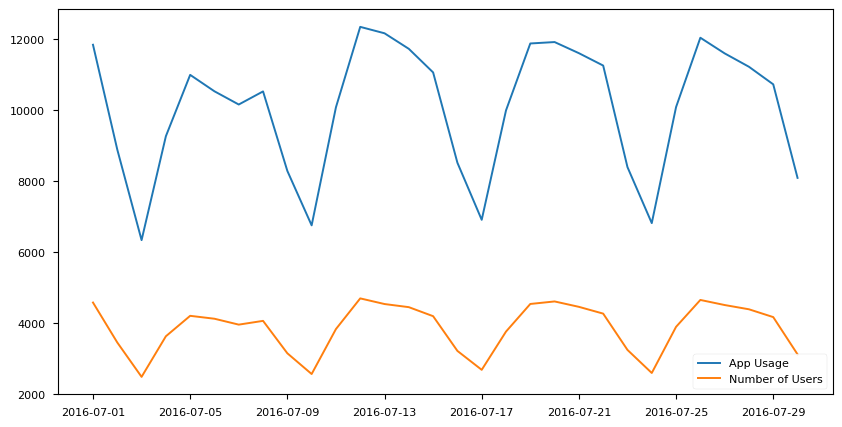

In [ ]:
# 언제(datetime)를 활용해서 앱의 사용자 수를 확인한다.
# > 사용자수, 앱 사용 모두 일정한 패턴이 나타나는 것을 확인할 수 있다.
# > 사용이 줄어드는 요일에 대한 이해를 위해 추가적으로 요일을 추가한다.
plt.plot(df.groupby(['datetime']).size(), label='App Usage')
plt.plot(df.groupby(['datetime'])['sessionid'].nunique(), label='Number of Users')

plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

In [ ]:
df['dayOfTheWeek'] = df['datetime'].dt.day_name()
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayOfTheWeek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,Wednesday


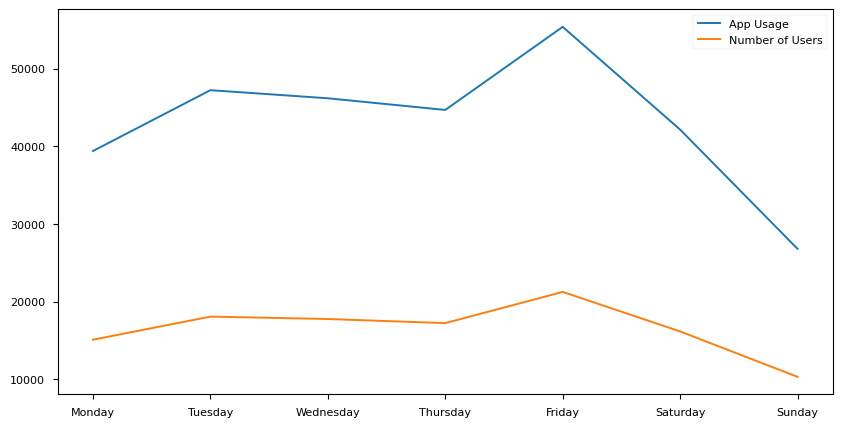

In [ ]:
# 요일을 기준으로 유저의 사용성 현황을 파악한다.
# 평일은 금요일을 제외하고 비슷한 사용량을 보이고 있다.
# 주말에는 사용성이 떨어지는 경향이 있다.

day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.plot(df.groupby(['dayOfTheWeek']).size().reindex(day_of_week), label='App Usage')
plt.plot(df.groupby(['dayOfTheWeek'])['sessionid'].nunique().reindex(day_of_week), label='Number of Users')

plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

In [ ]:
df.groupby(['datetime', 'documentposition']).size().unstack().isnull().sum()

documentposition
LOCALSTORAGE      0
MYPOLARISDRIVE    0
NEWDOCUMENT       0
NONE              0
OTHERAPP          0
OTHERCLOUD        0
SHAREDDOCUMENT    6
dtype: int64

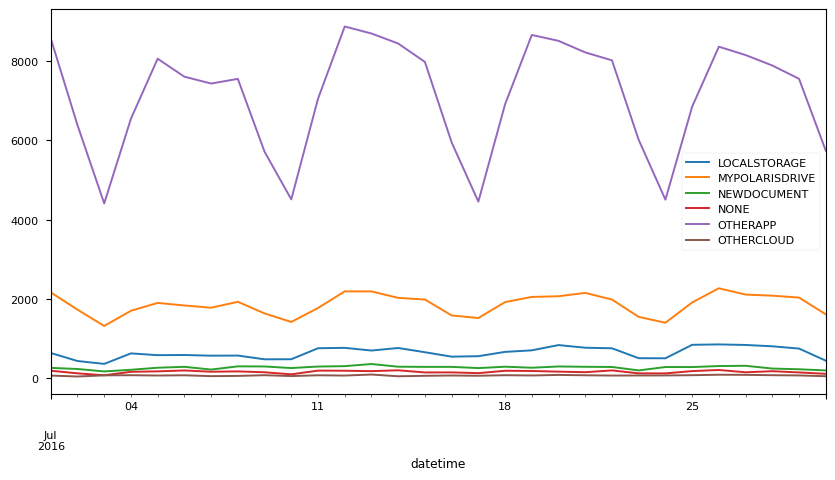

In [ ]:
# 어디서(document position, screen)를 활용해 사용성을 확인한다.
# SHAREDDOCUMENT는 차지하는 데이터가 적기 때문에 유의미한 결과를 찾기 어려워 보인다.
# 그래서 해당 Column은 버린다.
# > App을 여는 위치는 "Other App"이 차지하는 비중이 높다. 많은 유저들이 사용하기 때문에 앞서 살펴봤던 일별 패턴을 보여주고 있다.
# > 그리고 My Polaris Drive가 다음을 차지하고 있다.

df.groupby(['datetime', 'documentposition']).size().unstack().dropna(axis=1).plot()
plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

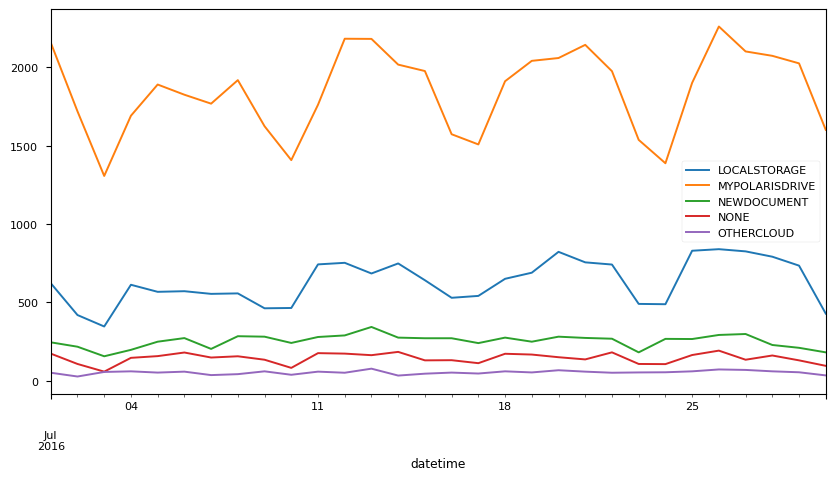

In [ ]:
# 일정 이상의 사용량을 보이면, 평일에 사용량이 높아지고 주말에는 낮아지는 패턴을 보여주고 있다.
# 다만, 사용량이 적은 데이터의 경우에는 평일 / 주말의 큰 차이는 보이지 않고 있다.

df.groupby(['datetime', 'documentposition']).size().unstack().dropna(
    axis=1).drop(columns=['OTHERAPP']).plot()

plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

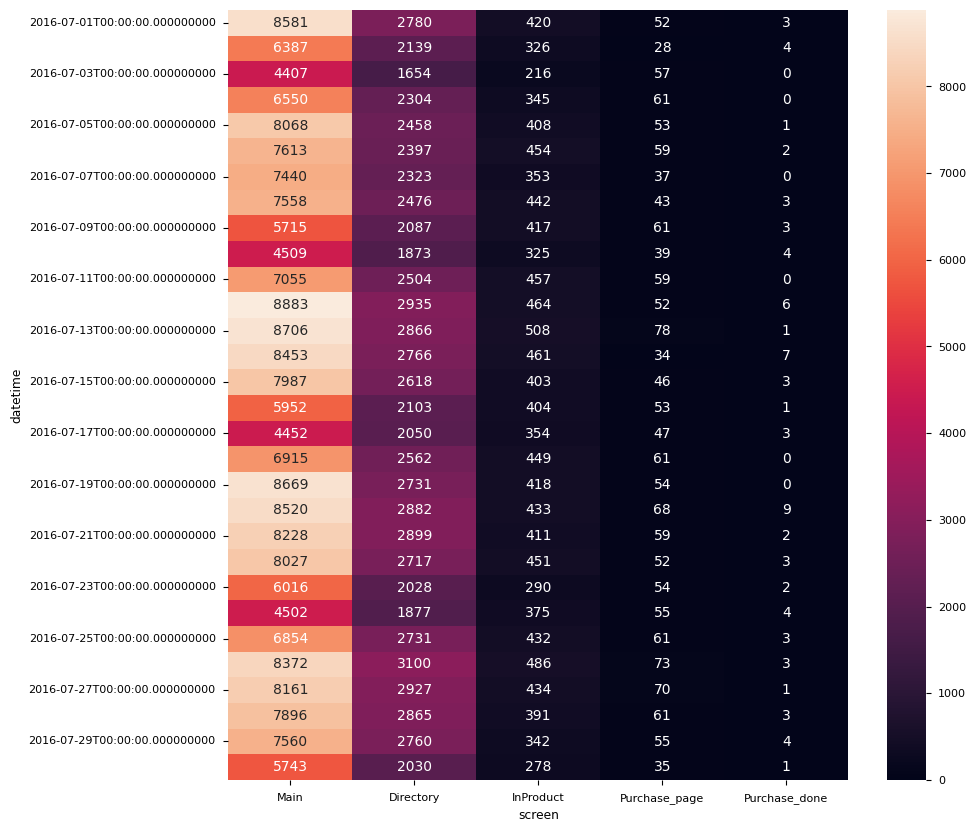

In [ ]:
# 어디서(screen)를 활용해서 사용성을 확인한다.
# 실제 단계별 사용량을 체크하기 전에 처음 > 끝으로 갈수록 사용량이 떨어진다고 충분히 생각할 수 있다.
df_by_screen = df.groupby(['datetime', 'screen']).size().unstack().fillna(0).astype(int)
df_by_screen = df_by_screen[df_by_screen.mean().sort_values(ascending=False).index]

sns.heatmap(df_by_screen, annot=True, fmt='d')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(10, 10)
plt.show()

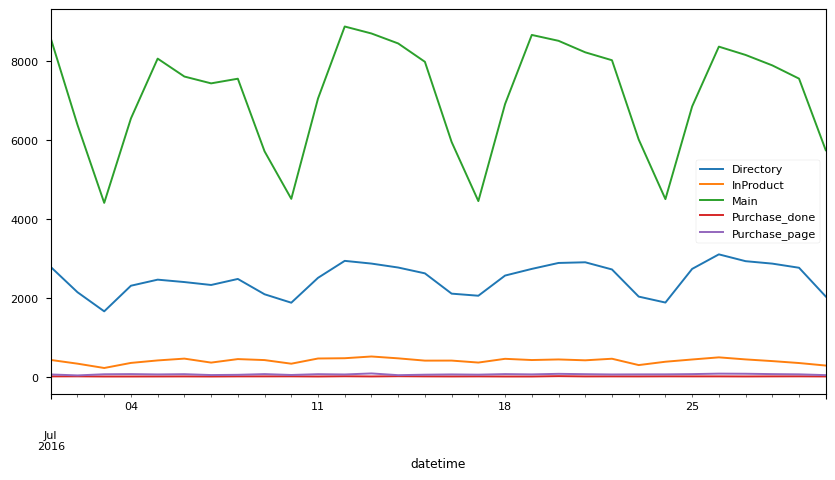

In [ ]:
df.groupby(['datetime', 'screen']).size().unstack().fillna(0).astype(int).plot()

plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

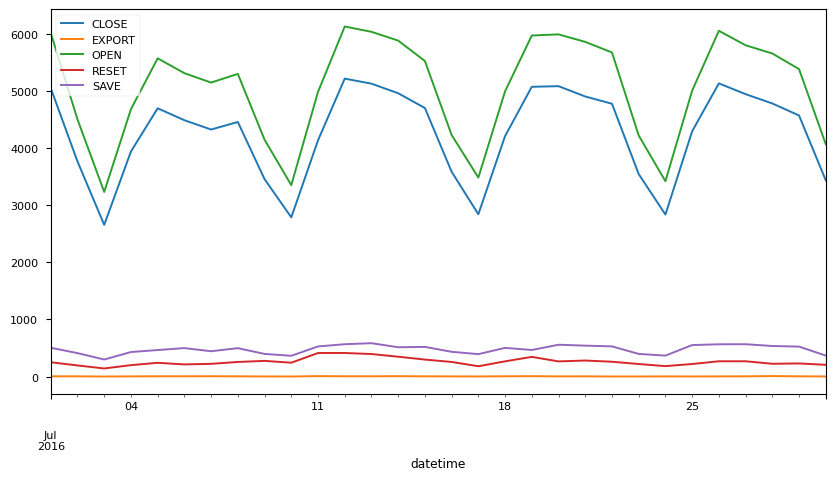

In [ ]:
# 무엇을(action type)
# > 유저의 대부분의 행동이 Open, Close에 몰려있다는 것을 알 수 있다.
df.groupby(['datetime', 'actiontype']).size().unstack().fillna(0).plot()

plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

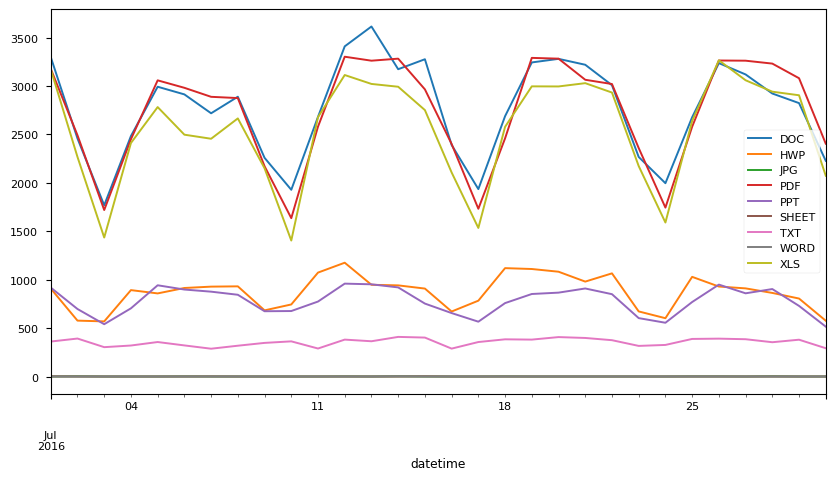

In [ ]:
# 어떻게(ext)
# > 주로 사용하는 문서는 PDF, XLS, DOC 임을 알 수 있다.
df.groupby(['datetime', 'ext']).size().unstack().fillna(0).plot()

plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

유저들의 사용성 현황
* 유저들은 대부분 평일에 사용하고, 주말에 사용량이 줄어든다.
* 주요 문서를 실행하는 위치는 Other App 이다.
* 유저들은 주로 Open, Close 기능을 사용하고 있다.
* 주로 사용하는 문서는 PDF, XLS, DOC 이다.

#### 3.2.2 단계별 전환율 확인

In [ ]:
# 앞선 유저의 사용성 by screen을 통해서 Main > Purchase Done으로 갈수록 떨어지는 것을 대략적으로 확인할 수 있었다.
# 여기서는 단계별 전환율의 구체적인 수치를 확인한다.
# 급격히 떨어지는 구간을 찾아서 가장 먼저 개선한다.

In [ ]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayOfTheWeek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,Wednesday


In [ ]:
screen_by_users = df.groupby(['datetime', 'screen'])['sessionid'].nunique().unstack().fillna(0).astype(int)
screen_by_users = screen_by_users[screen_by_users.mean().sort_values(ascending=False).index]
screen_by_users

screen,Main,Directory,InProduct,Purchase_page,Purchase_done
datetime,,,,,
2016-07-01,3582,1254,272,23,2
2016-07-02,2683,953,200,15,2
2016-07-03,1886,725,130,28,0
2016-07-04,2808,982,202,29,0
2016-07-05,3335,1090,239,26,1
2016-07-06,3256,1103,265,30,1
2016-07-07,3150,1016,216,18,0
2016-07-08,3208,1091,248,20,2
2016-07-09,2381,925,228,23,2


In [ ]:
conversion_series_avg = screen_by_users.mean()

screen_list = []
conversion_rate_list = []

for i in range(len(conversion_series_avg) - 1):
    screen_list.append(f'{conversion_series_avg.index[i]} > {conversion_series_avg.index[i+1]}')

    conversion_rate = (conversion_series_avg[i+1] / conversion_series_avg[i]) * 100
    conversion_rate_list.append(conversion_rate)

In [ ]:
conversion_df = pd.DataFrame({
    'screen': screen_list,
    'conversion_rate': conversion_rate_list})

conversion_df = conversion_df.sort_values(by=['conversion_rate'], ascending=False)
conversion_df.reset_index(drop=True, inplace=True)
conversion_df

,screen,conversion_rate
0,Main > Directory,36.552016
1,Directory > InProduct,21.266858
2,InProduct > Purchase_page,10.559541
3,Purchase_page > Purchase_done,7.201087


In [ ]:
conversion_df['churn_rate'] = 100 - conversion_df['conversion_rate']
conversion_df

,screen,conversion_rate,churn_rate
0,Main > Directory,36.552016,63.447984
1,Directory > InProduct,21.266858,78.733142
2,InProduct > Purchase_page,10.559541,89.440459
3,Purchase_page > Purchase_done,7.201087,92.798913


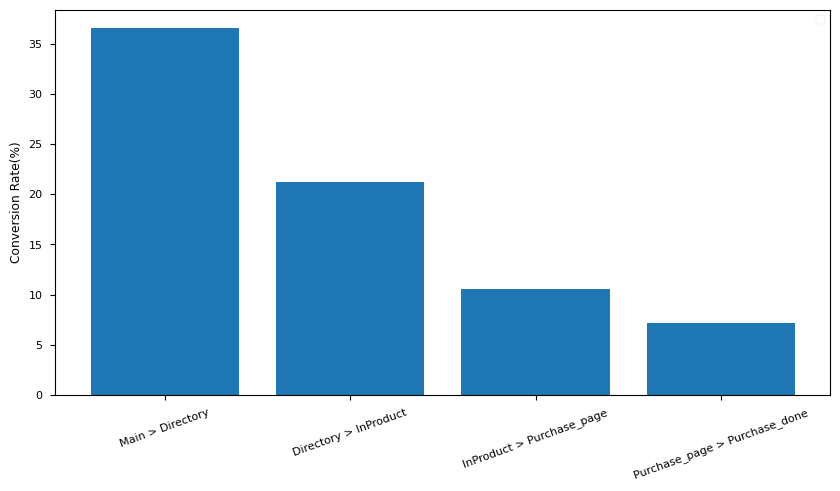

In [ ]:
# 단계별 전환율은 다음과 같다.
# 하지만, 고객마다 특성이 다르기 때문에 분류한 다음에 집단마다 집중해야 하는 단계를 살펴보도록 한다.

plt.bar(screen_list, conversion_rate_list)

plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=20)
plt.ylabel('Conversion Rate(%)')
plt.legend()
plt.show()

단계별 전환율
* 메인 페이지 > 디렉토리 페이지 (36.5%)
* 디렉토리 페이지 > 제품 페이지 (21.3%)
* 제품 페이지 > 구매 페이지 (10.6%)
* 구매 페이지 > 구매 확정 페이지 (7.2%)

단계별 전환율을 전체적으로 살펴보면, 당장 개선이 필요한 지점은 구매 페이지 > 구매 확정 페이지이다.

##### KMeans를 활용한 Segmentation

In [ ]:
# 앱을 사용하는 전체 유저들을 대상으로 동일한 액션을 취하기보다는 고객들을 구분지어 분석을 진행한다.
# 고객의 특성을 고려해서 분할하고, 단계별 전환율을 다시 살펴보도록 한다.

In [ ]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayOfTheWeek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,Wednesday


고객을 구분짓는 Column을 선택한다. 현재 가지고 있는 데이터 중에서 ext가 가장 고객을 잘 분류한다고 생각한다. ext를 선택한 이유는 문서의 확장자에 따라 문서를 사용하는 이유가 명확하게 구분된다고 생각했다.

In [ ]:
# 앱을 사용하는 유저들을 구분지으려고 할 때, 어떤 특징을 이용해서 구분 지을지를 결정해야 한다.
# 선택할 수 있는 특징 - action type, ext, document position, datetime, day of the week

# 문서의 확장자에 따라서 역할이 명확하게 구분되기 때문에 유저를 구분지을 때, ext를 활용한다.
# ex. DOC / PDF / XLS 문서 사용의 목적이 구분된다고 생각해서 ext를 사용한다.

In [ ]:
# JPG, SHEET, WORD 는 데이터의 양이 부족, 그리고 연산량을 줄이기 위해서 일부 Column은 제외하고 진행하려 한다.
df['ext'].value_counts()

DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: ext, dtype: int64

In [ ]:
except_ext_list = ['JPG', 'SHEET', 'WORD']
df_by_ext = df.groupby(['sessionid', 'ext']).size().unstack().fillna(0)
df_by_ext = df_by_ext.drop(except_ext_list, axis=1)
df_by_ext

ext,DOC,HWP,PDF,PPT,TXT,XLS
sessionid,,,,,,
0001625bdb4fb9136f3f660f1b82188a,3.0,0.0,0.0,0.0,0.0,0.0
0001b27b377723145af12ec5f11a24a1,0.0,0.0,4.0,0.0,0.0,0.0
000210e29d35134179a3e3cf6ba8af36,2.0,0.0,0.0,0.0,0.0,0.0
00037c1d86c69902bffdc527f4fe21a8,4.0,0.0,0.0,0.0,0.0,0.0
0003abfa05f41cf0771a1f48a9e5ac78,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...
fffe3ab63705abbc168c8d15545162f5,0.0,0.0,4.0,0.0,0.0,0.0
fffe4ee272618517eca863c44592d1ce,0.0,0.0,2.0,0.0,0.0,0.0
fffe59ea44cad5fefc96d09fd1456c94,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
# 고객을 분할하기 위한 그룹 수를 결정해야 한다.
# DOC, TXT, HWP / PPT / PDF / XLS
# 확장자별 성격에 따라서 위와 같이 구분될 수 있다고 생각을 했다.
# 그래서 그룹의 수를 4로 설정하고, KMeans를 진행해서 고객을 분할하려 한다.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(df_by_ext)

In [ ]:
df_by_ext['group'] = kmeans.labels_
df_by_ext.head()

ext,DOC,HWP,PDF,PPT,TXT,XLS,group
sessionid,,,,,,,
0001625bdb4fb9136f3f660f1b82188a,3.0,0.0,0.0,0.0,0.0,0.0,1
0001b27b377723145af12ec5f11a24a1,0.0,0.0,4.0,0.0,0.0,0.0,2
000210e29d35134179a3e3cf6ba8af36,2.0,0.0,0.0,0.0,0.0,0.0,1
00037c1d86c69902bffdc527f4fe21a8,4.0,0.0,0.0,0.0,0.0,0.0,1
0003abfa05f41cf0771a1f48a9e5ac78,0.0,0.0,0.0,0.0,0.0,2.0,0


In [ ]:
session_group_dict = {
    session_id: group for session_id, group in zip(df_by_ext.index, df_by_ext['group'].values)
}

In [ ]:
df['group'] = df['sessionid'].apply(lambda x : session_group_dict[x])
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayOfTheWeek,group
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday,2
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Directory,Monday,2
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday,2
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Directory,Monday,2
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,Wednesday,2


In [ ]:
def group_conversion_rate(group_number):
    group_conversion_avg = df[df['group'] == group_number].groupby(
        ['datetime', 'screen'])['sessionid'].nunique().unstack().fillna(0).mean()

    return group_conversion_avg.sort_values(ascending=False)

In [ ]:
def conversion_plot(conv_series):
    label_list = []
    conversion_list = []
    for i in range(len(conv_series) - 1):
        label_list.append(f'{conv_series.index[i]} > {conv_series.index[i+1]}')
        conversion_list.append((conv_series[i+1] / conv_series[i]) * 100)

    plt.bar(label_list, conversion_list)

    plt.xticks(rotation=20)
    plt.ylabel('Conversion Rate(%)')

    plt.gcf().set_size_inches(15, 5)
    plt.show()

In [ ]:
def conversion_df(conv_series, group_name):
    label_list = []
    conversion_list = []
    for i in range(len(conv_series) - 1):
        label_list.append(f'{conv_series.index[i]} > {conv_series.index[i+1]}')
        conversion_list.append((conv_series[i+1] / conv_series[i]) * 100)

    return pd.DataFrame(
        {group_name: conversion_list},
        index=label_list)

In [ ]:
# group_num = 0
zero_conversion_avg = group_conversion_rate(0)
zero_conversion_avg

screen
Main             637.066667
Directory        267.266667
InProduct         41.333333
Purchase_page     10.766667
Purchase_done      0.133333
dtype: float64

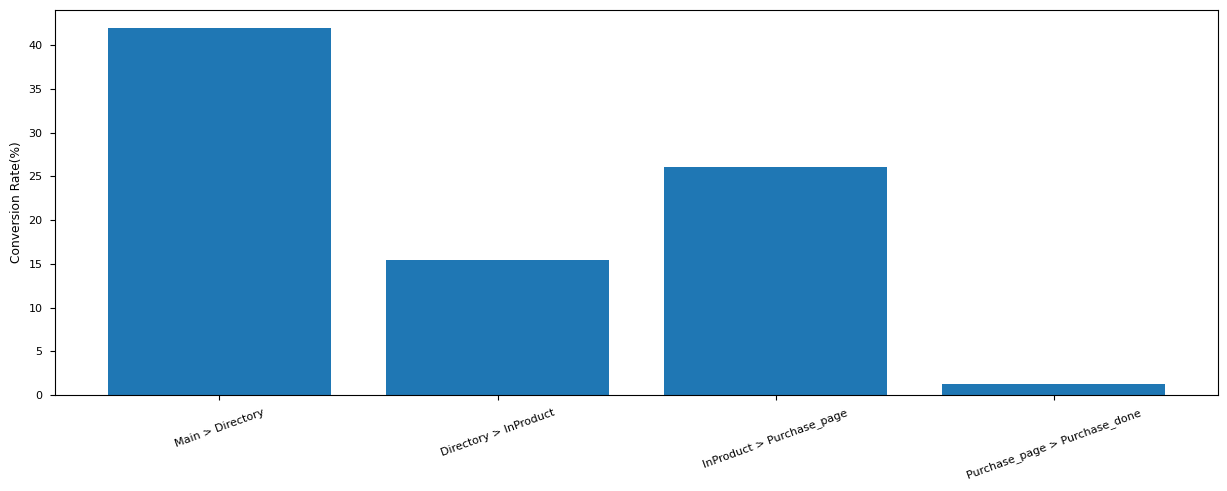

In [ ]:
conversion_plot(zero_conversion_avg)

In [ ]:
zero_conversion_df = conversion_df(zero_conversion_avg, 'zero')
zero_conversion_df

,zero
Main > Directory,41.952700
Directory > InProduct,15.465203
InProduct > Purchase_page,26.048387
Purchase_page > Purchase_done,1.238390


In [ ]:
# group_num = 1
one_conversion_avg = group_conversion_rate(1)
one_conversion_avg

screen
Main             673.866667
Directory        244.733333
InProduct         81.533333
Purchase_page      5.800000
Purchase_done      0.366667
dtype: float64

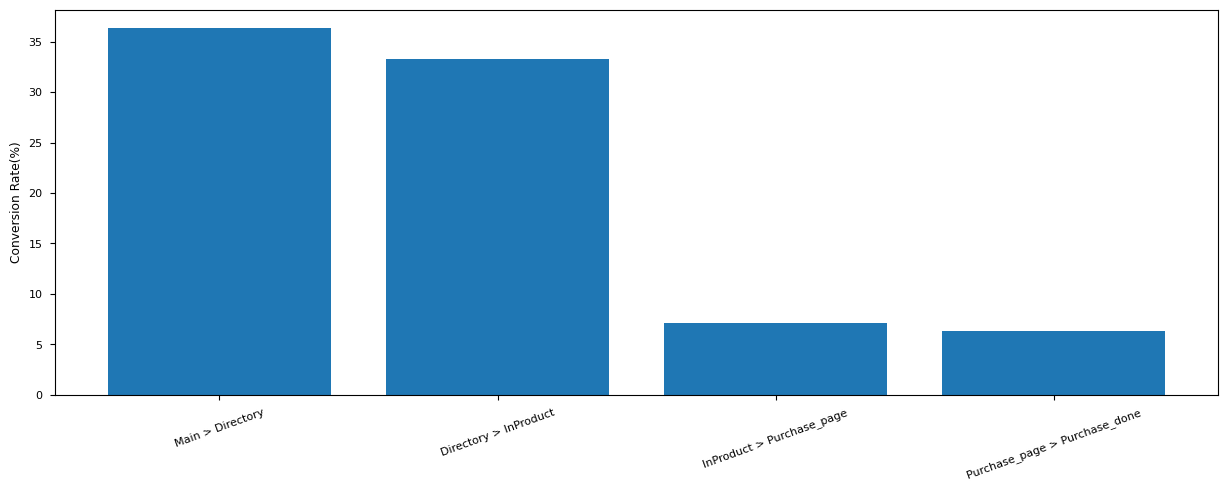

In [ ]:
conversion_plot(one_conversion_avg)

In [ ]:
one_conversion_df = conversion_df(one_conversion_avg, 'one')
one_conversion_df

,one
Main > Directory,36.317768
Directory > InProduct,33.315173
InProduct > Purchase_page,7.113655
Purchase_page > Purchase_done,6.321839


In [ ]:
# group_num = 2
two_conversion_avg = group_conversion_rate(2)
two_conversion_avg

screen
Main             1024.666667
Directory         224.766667
InProduct          18.933333
Purchase_page       3.433333
Purchase_done       0.400000
dtype: float64

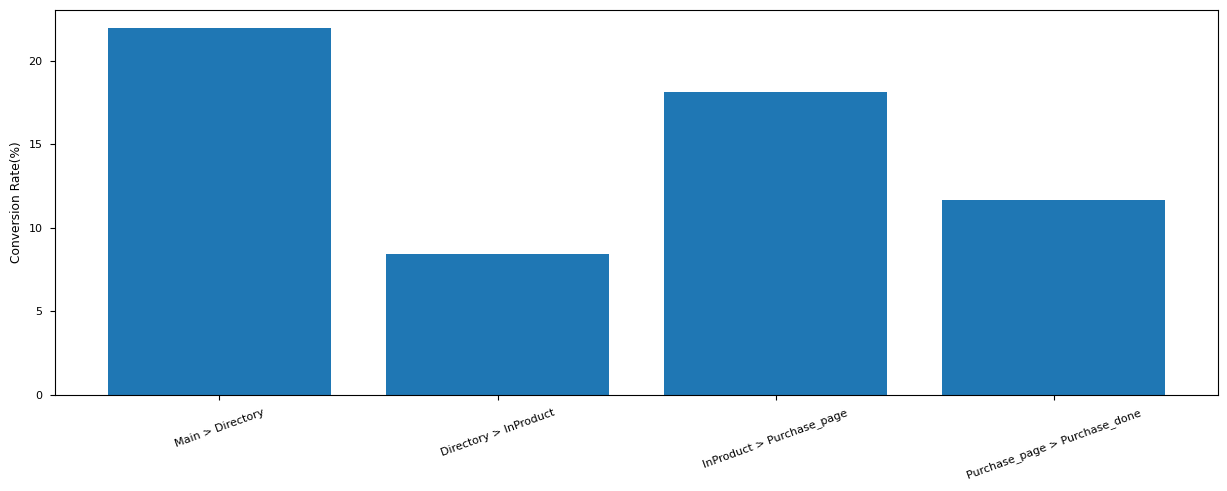

In [ ]:
conversion_plot(two_conversion_avg)

In [ ]:
two_conversion_df = conversion_df(two_conversion_avg, 'two')
two_conversion_df

,two
Main > Directory,21.935589
Directory > InProduct,8.423550
InProduct > Purchase_page,18.133803
Purchase_page > Purchase_done,11.650485


In [ ]:
# group_num = 3
three_conversion_avg = group_conversion_rate(3)
three_conversion_avg

screen
Main             653.200000
Directory        355.700000
InProduct         90.533333
Purchase_page      4.533333
Purchase_done      0.866667
dtype: float64

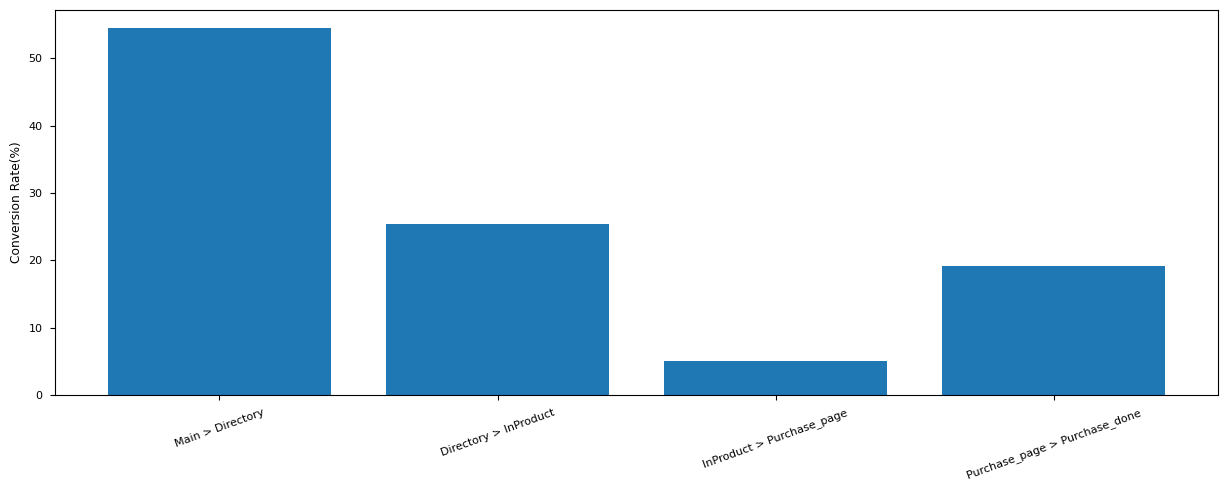

In [ ]:
conversion_plot(three_conversion_avg)

In [ ]:
three_conversion_df = conversion_df(three_conversion_avg, 'three')
three_conversion_df

,three
Main > Directory,54.454991
Directory > InProduct,25.452160
InProduct > Purchase_page,5.007364
Purchase_page > Purchase_done,19.117647


In [ ]:
def conversion_plot(series_list):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # series_list = [conv_series_1, conv_series_2, conv_series_3, conv_series_4]
    titles = ['Zero Group', 'One Group', 'Two Group', 'Three Group']

    for i, ax in enumerate(axes.flat):
        conv_series = series_list[i]
        label_list = []
        conversion_list = []

        for j in range(len(conv_series) - 1):
            label_list.append(f'{conv_series.index[j]} > {conv_series.index[j+1]}')
            conversion_list.append((conv_series[j+1] / conv_series[j]) * 100)

        ax.bar(label_list, conversion_list)
        ax.set_title(titles[i])
        ax.set_ylabel('Conversion Rate(%)')
        ax.tick_params(axis='x', rotation=20)

    plt.show()

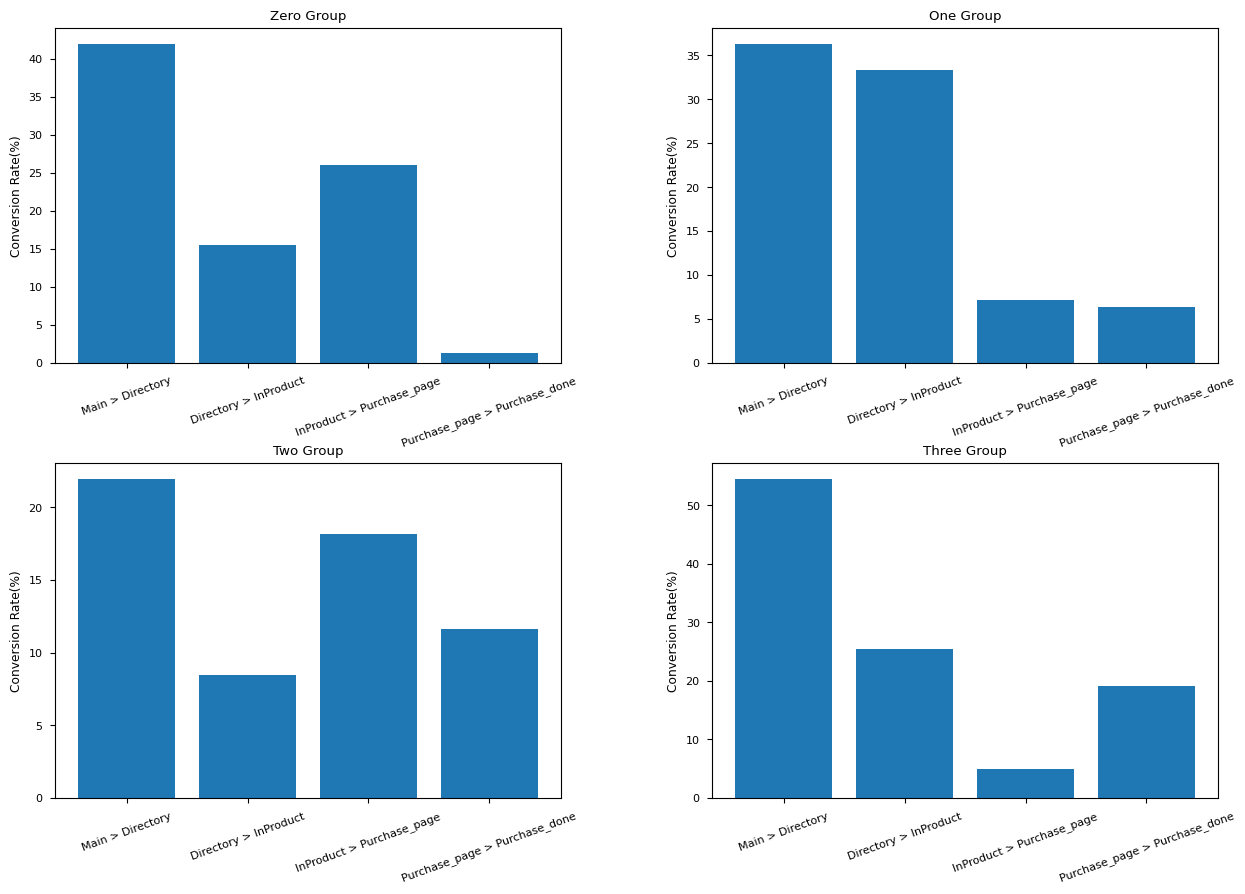

In [ ]:
series_list = [
    zero_conversion_avg,
    one_conversion_avg,
    two_conversion_avg,
    three_conversion_avg
]

conversion_plot(series_list)

In [ ]:
# 앞서서 전체 고객에 대해서 단계별 전환율을 살펴본 것과 다르게 그룹(0, 1, 2, 3) 간에 차이가 보인다.

# 그래서 그룹 별로 집중해야 하는 행동이 달라진다. 여기에 맞춰서 단계별 전환 개선을 위해서 행동을 다르게 진행한다.
# Group 0 - 디렉토리 페이지 > 제품 / 구매 > 구매 확정
# Group 1 - 제품 > 구매 / 구매 > 구매 확정
# Group 2 - 디렉토리 페이지 > 제품
# Group 3 - 제품 > 구매

In [ ]:
zero_conversion_df

,zero
Main > Directory,41.952700
Directory > InProduct,15.465203
InProduct > Purchase_page,26.048387
Purchase_page > Purchase_done,1.238390


In [ ]:
total_conversion_df = pd.merge(
    zero_conversion_df, one_conversion_df,
    left_index=True, right_index=True)

total_conversion_df = total_conversion_df.merge(
    two_conversion_df,
    left_index=True, right_index=True)

total_conversion_df = total_conversion_df.merge(
    three_conversion_df,
    left_index=True, right_index=True)

total_conversion_df

,zero,one,two,three
Main > Directory,41.952700,36.317768,21.935589,54.454991
Directory > InProduct,15.465203,33.315173,8.423550,25.452160
InProduct > Purchase_page,26.048387,7.113655,18.133803,5.007364
Purchase_page > Purchase_done,1.238390,6.321839,11.650485,19.117647


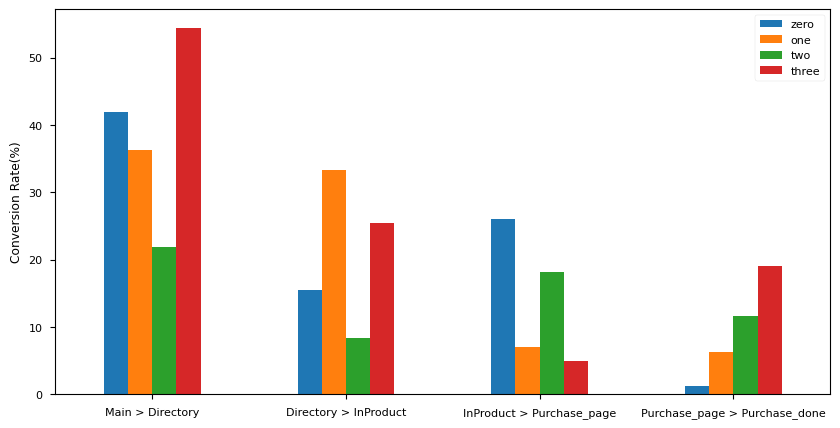

In [ ]:
total_conversion_df.plot(kind='bar')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(10, 5)
plt.ylabel('Conversion Rate(%)')
plt.show()

## 4. 분석 내용 정리

### 4.1 유저의 사용성 현황
* 유저들은 대부분 평일에 사용하고, 주말에 사용량이 줄어든다.
* 주요 문서를 실행하는 위치는 Other App 이다.
* 유저들은 주로 Open, Close 기능을 사용하고 있다.
* 주로 사용하는 문서는 PDF, XLS, DOC 이다.

### 4.2 유저들의 이탈률 개선이 필요한 구간

* Group 0 - 구매 > 구매 확정
* Group 1 - 제품 > 구매 / 구매 > 구매 확정
* Group 2 - 디렉토리 > 제품
* Group 3 - 제품 > 구매

## 5. 이탈률 개선을 위한 해결 방안 제시

Group 0
* 구매 > 구매 확정 - 리마인드 캠페인과 더불어 즉시 사용해야 하는 시간제한 혜택 등으로 빠른 구매 결정을 내릴 수 있도록 유도하는 액션이 필요합니다.

Group 1
* 제품 > 구매 - 구매 욕구를 불러일으키는 데에 집중해야 합니다. 조회한 상품과의 연관 상품을 추천하거나, 구매 시 사용 가능한 혜택을 제시함으로써 바로 구매할 수 있도록 유도하는 방법을 제안한다.
* 구매 > 구매 확정 - 리마인드 캠페인과 더불어 즉시 사용해야 하는 시간제한 혜택 등으로 빠른 구매 결정을 내릴 수 있도록 유도하는 액션이 필요합니다.

Group 2
* 디렉토리 > 제품 - 인기가 많은 상품을 소개함으로써 상품 상세페이지를 조회하도록 유도합니다. 상품 추천 메시지에 상품별 특징을 활용해 주력상품과 베스트 상품 등을 추천해서 상세 페이지를 조회할 확률을 높인다.

Group 3
* 제품 > 구매 - 구매 욕구를 불러일으키는 데에 집중해야 합니다. 조회한 상품과의 연관 상품을 추천하거나, 구매 시 사용 가능한 혜택을 제시함으로써 바로 구매할 수 있도록 유도하는 방법을 제안한다.

In [ ]:
df_group_dict = {
    'group_0': df.loc[df['group'] == 0, 'sessionid'].values,
    'group_1': df.loc[df['group'] == 1, 'sessionid'].values,
    'group_2': df.loc[df['group'] == 2, 'sessionid'].values,
    'group_3': df.loc[df['group'] == 3, 'sessionid'].values,
}

In [ ]:
# 이탈률 개선과 관련해서 아래와 같은 그룹별 개선 방안을 제시한다.
# 이를 통해 그룹별로 전환율이 낮은 구간을 끌어올린다.

# 구매 > 구매 확정
# 장바구니 리마인드 캠페인과 더불어 즉시 사용해야 하는 시간제한 혜택 등으로 빠른 구매 결정을 내릴 수 있도록 유도하는 액션이 필요합니다.

# 제품 > 구매
# 구매 욕구를 불러일으키는 데에 집중해야 합니다.
# 조회한 상품과의 연관 상품을 추천하거나, 구매 시 사용 가능한 혜택을 제시함으로써 바로 구매할 수 있도록 유도하는 방법을 제안한다.

# 디렉토리 > 제품
# 인기가 많은 상품을 소개함으로써 상품 상세페이지를 조회하도록 유도합니다.
# 상품 추천 메시지에 상품별 특징을 활용해 주력상품과 베스트 상품 등을 추천해서 상세 페이지를 조회할 확률을 높인다.